In [1]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)


In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy.interpolate import interp1d

In [8]:
a_classified = pd.read_excel('../input/quotient_deviation_df_A_CLASSIFIED.xlsx')

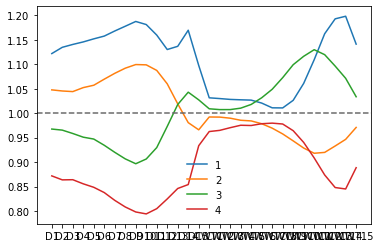

In [13]:
for i in range(4):
    plt.plot(a_classified[a_classified['Class 4']==i].mean(axis=0)[1:31],label=str(i+1))
plt.axhline(y=1, color='dimgray', linestyle='--')
plt.legend(frameon=False)

In [19]:
from numpy import trapz

for i in range(4):
    selected = a_classified[a_classified['Class 4']==i].mean(axis=0)[1:31]
    pos = trapz([el for el in selected[:15] if el >= 1])
    neg = trapz([el for el in selected[:15] if el < 1])
    print('Diam', i+1, ':', pos - neg)

for i in range(4):
    selected = a_classified[a_classified['Class 4']==i].mean(axis=0)[1:31]
    pos = trapz([el for el in selected[15:] if el >= 1])
    neg = trapz([el for el in selected[15:] if el < 1])
    print('CWT', i+1, ':', pos - neg)

for i in range(4):
    selected = a_classified[a_classified['Class 4']==i].mean(axis=0)[1:31]
    pos = trapz([el for el in selected if el >= 1])
    neg = trapz([el for el in selected if el < 1])
    print('Diam + CWT', i+1, ':', pos - neg)

Diam 1 : 16.147704995346956
Diam 2 : 11.846233096008525
Diam 3 : -8.220909367821411
Diam 4 : -11.72601158144886
CWT 1 : 14.988937491111374
CWT 2 : -13.427999589801171
CWT 3 : 14.848086172399565
CWT 4 : -13.127053279195788
Diam + CWT 1 : 32.20099378848954
Diam + CWT 2 : -2.560847024946554
Diam + CWT 3 : 7.64521568483503
Diam + CWT 4 : -25.801087389383383


In [25]:
crn = pd.read_excel('../input/BGD_chron.xlsx')
crn = crn[crn['Year']>1812]

In [55]:
diam_scale = {
    1:4,
    2:3,
    3:2,
    4:1
}

cwt_scale = {
    1:4,
    2:1,
    3:3,
    4:2
}

diam_cwt_scale = {
    1:4,
    2:2,
    3:3,
    4:1
}

In [56]:
def dropna_pearsonr(x, y):
    x, y = np.array(x), np.array(y)
    nas = np.logical_or(np.isnan(x), np.isnan(y))
    x, y = x[~nas], y[~nas]
    r, p = pearsonr(x, y)
    return r, p

def dropna_spearmanr(x, y):
    x, y = np.array(x), np.array(y)
    nas = np.logical_or(np.isnan(x), np.isnan(y))
    x, y = x[~nas], y[~nas]
    r, p = spearmanr(x,y)
    return r, p

def running_mean(x, N=21):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [57]:
from numpy import trapz

for i in range(4):
    selected = a_classified[a_classified['Class 4']==i].mean(axis=0)[1:31]
    pos = trapz([el for el in selected[:15] if el >= 1])
    neg = trapz([el for el in selected[:15] if el < 1])
    print('Diam', i+1, ':', pos - neg)

for i in range(4):
    selected = a_classified[a_classified['Class 4']==i].mean(axis=0)[1:31]
    pos = trapz([el for el in selected[15:] if el >= 1])
    neg = trapz([el for el in selected[15:] if el < 1])
    print('CWT', i+1, ':', pos - neg)

for i in range(4):
    selected = a_classified[a_classified['Class 4']==i].mean(axis=0)[1:31]
    pos = trapz([el for el in selected if el >= 1])
    neg = trapz([el for el in selected if el < 1])
    print('Diam + CWT', i+1, ':', pos - neg)

Diam 1 : 16.147704995346956
Diam 2 : 11.846233096008525
Diam 3 : -8.220909367821411
Diam 4 : -11.72601158144886
CWT 1 : 14.988937491111374
CWT 2 : -13.427999589801171
CWT 3 : 14.848086172399565
CWT 4 : -13.127053279195788
Diam + CWT 1 : 32.20099378848954
Diam + CWT 2 : -2.560847024946554
Diam + CWT 3 : 7.64521568483503
Diam + CWT 4 : -25.801087389383383


In [58]:
y1 = [diam_scale[i+1] for i in a_classified['Class 4']]
y2 = [cwt_scale[i+1] for i in a_classified['Class 4']]
y3 = [diam_cwt_scale[i+1] for i in a_classified['Class 4']]

In [59]:
fig, axes = plt.subplots( nrows=5, ncols=1, dpi=300, figsize=(10,6))
plt.subplots_adjust(hspace=0)
axes[0].plot(crn['Year'], crn['res'], c='black', label='res')
axes[1].plot(crn['Year'], crn['std'], c='black', label='std')
#axes[0].legend(frameon=False)

x = a_classified['Year']
axes[2].bar(x, y1, color='dimgray')
axes[3].bar(x, y2, color='dimgray')
axes[4].bar(x, y3, color='dimgray')

x1 = np.arange(min(x), max(x), 0.2)
axes[2].plot(x1, interp1d(x, y1, kind='cubic')(x1), color='black')
axes[3].plot(x1, interp1d(x, y2, kind='cubic')(x1), color='black')
axes[4].plot(x1, interp1d(x, y3, kind='cubic')(x1), color='black')


axes[0].set_ylim([0, 2])
axes[1].set_ylim([0, 2])
axes[2].set_ylim([0,4.5])
axes[3].set_ylim([0,4.5])
axes[4].set_ylim([0,4.5])

axes[0].set_ylabel('res')
axes[1].set_ylabel('std')
axes[2].set_ylabel('Diam')
axes[3].set_ylabel('CWT')
axes[4].set_ylabel('Diam + CWT')

axes[0].set_yticks(np.arange(0.5,2, 0.5))
axes[1].set_yticks(np.arange(0.5,2, 0.5))
axes[2].set_yticks(range(1,5))
axes[3].set_yticks(range(1,5))
axes[4].set_yticks(range(1,5))

fig.savefig(f'../output/scale_res.png', dpi=300) 
plt.close(fig)

In [63]:
res = crn[crn['Year'].isin(a_classified['Year'])]['res']
print('corrwith;r;p-value')
r, p = dropna_spearmanr(res, y1)
print(f'res / Diam;{r};{p}')
r, p = dropna_spearmanr(res, y2)
print(f'res / CWT;{r};{p}')
r, p = dropna_spearmanr(res, y3)
print(f'res / Diam+CWT;{r};{p}')

std = crn[crn['Year'].isin(a_classified['Year'])]['std']
r, p = dropna_spearmanr(std, y1)
print(f'std / Diam;{r};{p}')
r, p = dropna_spearmanr(std, y2)
print(f'std / CWT;{r};{p}')
r, p = dropna_spearmanr(std, y3)
print(f'std / Diam+CWT;{r};{p}')

corrwith;r;p-value
res / Diam;0.5351230724307704;2.319230590398809e-16
res / CWT;0.28810872135587823;3.212007999691139e-05
res / Diam+CWT;0.5941614789353112;1.1526036628578605e-20
std / Diam;0.5129936567254323;5.917203112255471e-15
std / CWT;0.3241180919296343;2.5305856516314564e-06
std / Diam+CWT;0.6017988800204321;2.7464323654748068e-21


## Сглаженные 21-летним скользящим средним

In [61]:
fig, axes = plt.subplots( nrows=5, ncols=1, dpi=300, figsize=(10,6))
plt.subplots_adjust(hspace=0)
axes[0].plot(crn['Year'][10:-10], running_mean(list(crn['res'])), c='black', label='res')
axes[1].plot(crn['Year'][10:-10], running_mean(list(crn['std'])), c='black', label='std')
#axes[0].legend(frameon=False)

y1_ = running_mean(list(y1))
y2_ = running_mean(list(y2))
y3_ = running_mean(list(y3))

x = a_classified['Year']
axes[2].plot(x[10:-10], y1_, color='black')
axes[3].plot(x[10:-10], y2_, color='black')
axes[4].plot(x[10:-10], y3_, color='black')

axes[0].set_ylim([0.75, 1.25])
axes[1].set_ylim([0.75, 1.25])
axes[2].set_ylim([1,4])
axes[3].set_ylim([1,4])
axes[4].set_ylim([1,4])

axes[0].set_ylabel('res')
axes[1].set_ylabel('std')
axes[2].set_ylabel('Diam')
axes[3].set_ylabel('CWT')
axes[4].set_ylabel('Diam + CWT')

#axes[0].set_yticks(np.arange(0.5,2, 0.5))
#axes[1].set_yticks(np.arange(0.5,2, 0.5))
axes[2].set_yticks(np.arange(1.5,4.5, 1.0))
axes[3].set_yticks(np.arange(1.5,4.5, 1.0))
axes[4].set_yticks(np.arange(1.5,4.5, 1.0))

fig.savefig(f'../output/scale_res_rolled.png', dpi=300) 
plt.close(fig)

In [64]:
res = running_mean(list(crn[crn['Year'].isin(a_classified['Year'])]['res']))
print('corrwith;r;p-value')
r, p = dropna_spearmanr(res, y1_)
print(f'res / Diam;{r};{p}')
r, p = dropna_spearmanr(res, y2_)
print(f'res / CWT;{r};{p}')
r, p = dropna_spearmanr(res, y3_)
print(f'res / Diam+CWT;{r};{p}')

std = running_mean(list(crn[crn['Year'].isin(a_classified['Year'])]['res']))
r, p = dropna_spearmanr(std, y1_)
print(f'std / Diam;{r};{p}')
r, p = dropna_spearmanr(std, y2_)
print(f'std / CWT;{r};{p}')
r, p = dropna_spearmanr(std, y3_)
print(f'std / Diam+CWT;{r};{p}')

corrwith;r;p-value
res / Diam;0.33633424309643806;3.44899908138955e-06
res / CWT;0.35800040694896695;6.982067023304974e-07
res / Diam+CWT;0.46748842430791804;2.864921040174978e-11
std / Diam;0.33633424309643806;3.44899908138955e-06
std / CWT;0.35800040694896695;6.982067023304974e-07
std / Diam+CWT;0.46748842430791804;2.864921040174978e-11
